In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from glob import glob
from PIL import Image as img
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/My\ Drive/Data/SkinCancer.zip

In [ ]:
device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


In [ ]:
metadata = pd.read_csv("HAM10000_metadata.csv")
metadata.drop(['lesion_id','dx_type','age','sex','localization'],axis = 1,inplace = True)
metadata.head(5)

,image_id,dx
0,ISIC_0027419,bkl
1,ISIC_0025030,bkl
2,ISIC_0026769,bkl
3,ISIC_0025661,bkl
4,ISIC_0031633,bkl


In [ ]:
metadata.dx.value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [ ]:
le = LabelEncoder()
metadata['dx'] = le.fit_transform(metadata.dx)

In [ ]:
df1 = metadata[metadata.dx==0]
df2 = metadata[metadata.dx==1]
df3 = metadata[metadata.dx==2]
df4 = metadata[metadata.dx==3]
df5 = metadata[metadata.dx==4]
df6 = metadata[metadata.dx==5]
df7 = metadata[metadata.dx==6]

In [ ]:
samples = 200
df1_balanced = resample(df1,replace = True,n_samples = samples,random_state = 2)
df2_balanced = resample(df2,replace = True,n_samples = samples,random_state = 2)
df3_balanced = resample(df3,replace = True,n_samples = samples,random_state = 2)
df4_balanced = resample(df4,replace = True,n_samples = samples,random_state = 2)
df5_balanced = resample(df5,replace = True,n_samples = samples,random_state = 2)
df6_balanced = resample(df6,replace = True,n_samples = samples,random_state = 2)
df7_balanced = resample(df7,replace = True,n_samples = samples,random_state = 2)

In [ ]:
merged = pd.concat([df1_balanced,df2_balanced,df3_balanced,
                  df4_balanced,df5_balanced,df6_balanced,df7_balanced])

In [ ]:
dir = "/content/Skin Cancer"
id = [x.split('.')[0] for x in os.listdir(dir)]
image_path = {x:os.path.join(dir,f'{x}.jpg') for x in id}

In [ ]:
metadata['path'] = metadata.image_id.map(image_path.get)


In [ ]:
metadata['image'] = metadata.path.map(lambda x:np.asarray(img.open(x).resize((80,80))))

In [ ]:
metadata.drop(['image_id','path'],axis = 1,inplace = True)

In [ ]:
metadata['image'] = metadata.image.apply(lambda x: x/255)

In [ ]:
x = np.asarray(metadata['image'].tolist())
y = to_categorical(metadata['dx'],num_classes = 7)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 4)

In [ ]:
num_classes = 7
size = 80
model = Sequential()
model.add(Conv2D(256,(3,3), activation = "relu", input_shape = (size, size,3)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(32))
model.add(Dense(7,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 39, 39, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 18, 18, 128)       0

In [ ]:
model.compile(loss  = 'categorical_crossentropy', optimizer = 'Adam', metrics = 'acc')
batch_size = 16
epochs = 50
history = model.fit(x_train, y_train,epochs = epochs, batch_size= batch_size,
                   validation_data = (x_test, y_test), verbose = 2)
model.evaluate(x_test,y_test)

Epoch 1/50
470/470 - 24s - loss: 1.0182 - acc: 0.6702 - val_loss: 1.0087 - val_acc: 0.6641 - 24s/epoch - 51ms/step
Epoch 2/50
470/470 - 10s - loss: 0.9424 - acc: 0.6755 - val_loss: 1.0172 - val_acc: 0.6621 - 10s/epoch - 22ms/step
Epoch 3/50
470/470 - 10s - loss: 0.8934 - acc: 0.6855 - val_loss: 0.8783 - val_acc: 0.6845 - 10s/epoch - 21ms/step
Epoch 4/50
470/470 - 10s - loss: 0.8649 - acc: 0.6897 - val_loss: 0.9440 - val_acc: 0.6921 - 10s/epoch - 21ms/step
Epoch 5/50
470/470 - 10s - loss: 0.8139 - acc: 0.7034 - val_loss: 0.8517 - val_acc: 0.6969 - 10s/epoch - 20ms/step
Epoch 6/50
470/470 - 10s - loss: 0.7930 - acc: 0.7126 - val_loss: 0.8049 - val_acc: 0.7065 - 10s/epoch - 21ms/step
Epoch 7/50
470/470 - 10s - loss: 0.7646 - acc: 0.7124 - val_loss: 0.9344 - val_acc: 0.6701 - 10s/epoch - 21ms/step
Epoch 8/50
470/470 - 10s - loss: 0.7577 - acc: 0.7205 - val_loss: 0.7954 - val_acc: 0.7077 - 10s/epoch - 20ms/step
Epoch 9/50
470/470 - 10s - loss: 0.7347 - acc: 0.7344 - val_loss: 0.8388 - val_a

[0.7962316870689392, 0.7368211150169373]

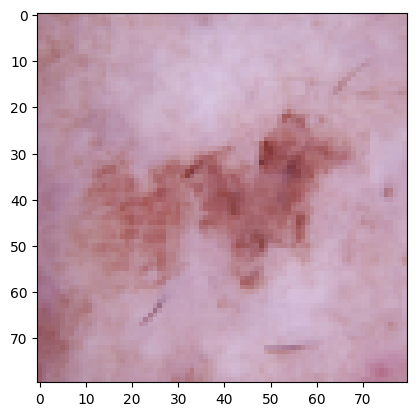

In [ ]:
plt.imshow(x_test[0])

In [ ]:
p = x_test[42].reshape([1,80,80,3])

In [ ]:
print([round(x,3) for x in model.predict(p)[0]])
print(y_test[42])

1/1 [==============================] - 0s 200ms/step
[0.038, 0.789, 0.096, 0.021, 0.003, 0.051, 0.002]
[0. 1. 0. 0. 0. 0. 0.]


In [ ]:
model.save("skin_cancer.h5")

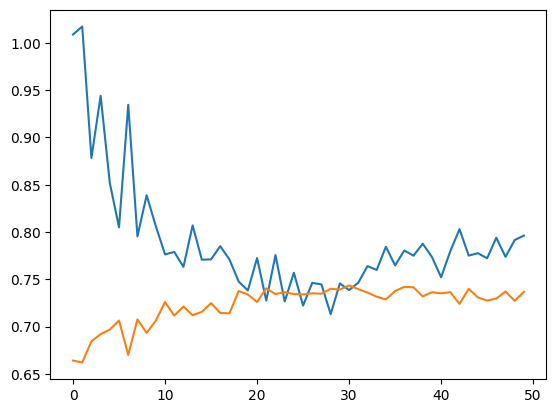

In [ ]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['acc'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_acc'])
plt.show()